# 1.Exploring the credit data

In [5]:
# importing the dataset
loan_data <- readRDS("data/loan_data_ch1.rds")

In [6]:
# View the structure of loan_data
str(loan_data)

'data.frame':	29092 obs. of  8 variables:
 $ loan_status   : int  0 0 0 0 0 0 1 0 1 0 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 12000 9000 3000 10000 1000 ...
 $ int_rate      : num  10.7 NA 13.5 NA NA ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 3 2 2 4 ...
 $ emp_length    : int  10 25 13 3 9 11 0 3 3 0 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 3 4 4 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 28 22 22 28 22 ...


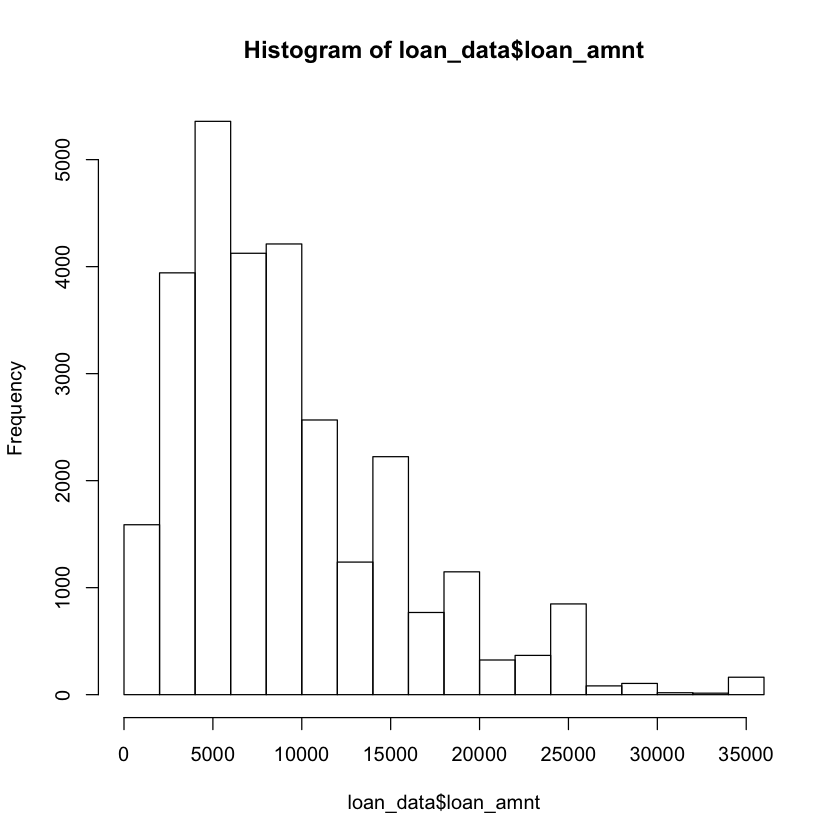

In [10]:
# Create histogram of loan_amnt
hist_1 <- hist(loan_data$loan_amnt)

In [11]:
# Print locations of the breaks in hist_1
hist_1$breaks

[1]     0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000
[13] 24000 26000 28000 30000 32000 34000 36000

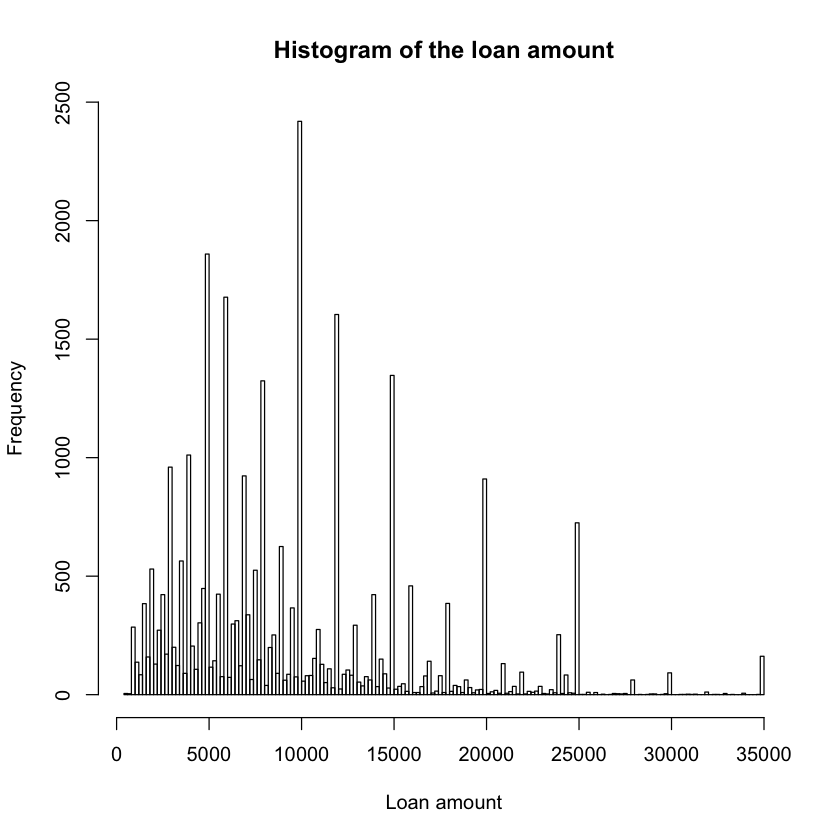

In [12]:
# Change number of breaks and add labels
hist_2 <- hist(loan_data$loan_amnt, breaks = 200, xlab = "Loan amount", 
               main = "Histogram of the loan amount")

The histogram shows that there are some high peaks at round values: 5000, 10000, 15000, etc. It signify that People tend to borrow on round numbers. 

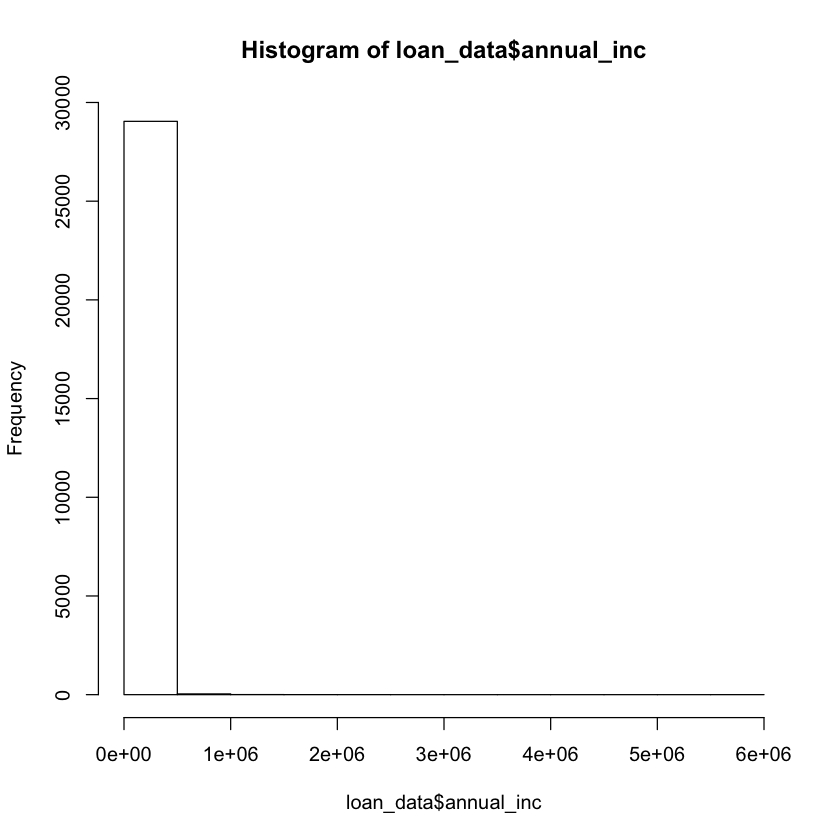

In [13]:
hist_3 <- hist(loan_data$annual_inc)

As for the variable `Age`, the historgram shows a lot of blank space on the right-hand side of the plot. This is an indication of possible outliers. To verify this, we will look at a scatterplot. 

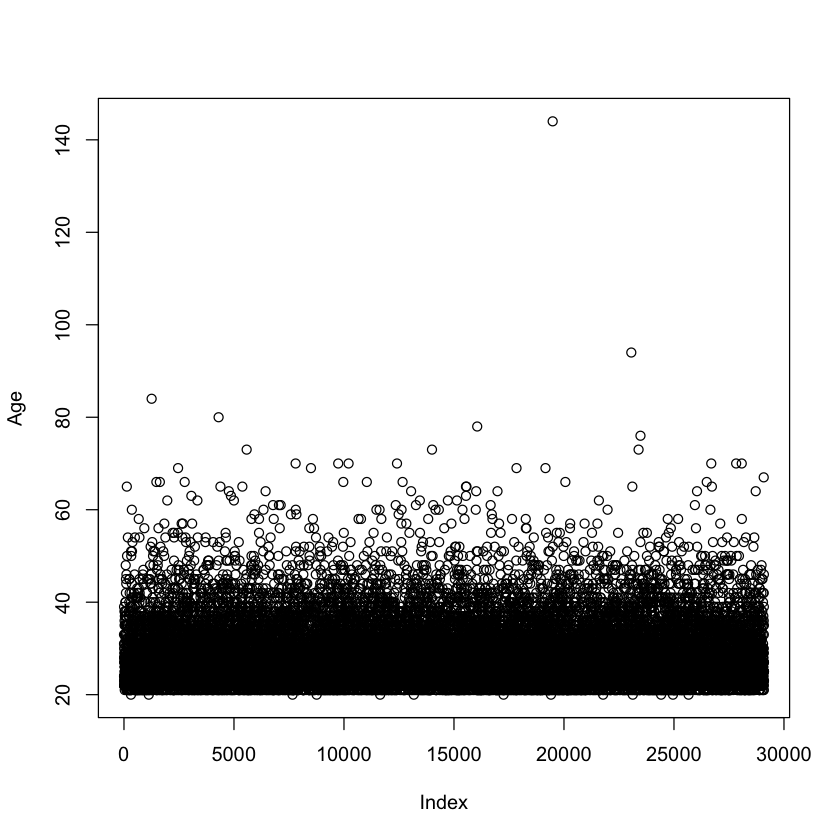

In [14]:
# Plot the age variable
plot(loan_data$age, ylab="Age")

The scatterplot shows that the oldest person in this data set is older than 122 years. We will get the index of this outlier using which() and the age of 122 as a cutoff. For this project, we will treat the outlier with deletion.

In [17]:
# Save the outlier's index to index_highage
index_highage <- which(loan_data$age > 122)
index_highage

[1] 19486

In [18]:
# Create data set new_data with outlier deleted
new_data <- loan_data[-index_highage, ]

It might also be useful to look at bivariate plots to check if outliers are observed for several variables. It's possible the outliers belong to the same observation. If so, there is even more reason to delete the observation because it is more likely that some information stored in it is wrong.

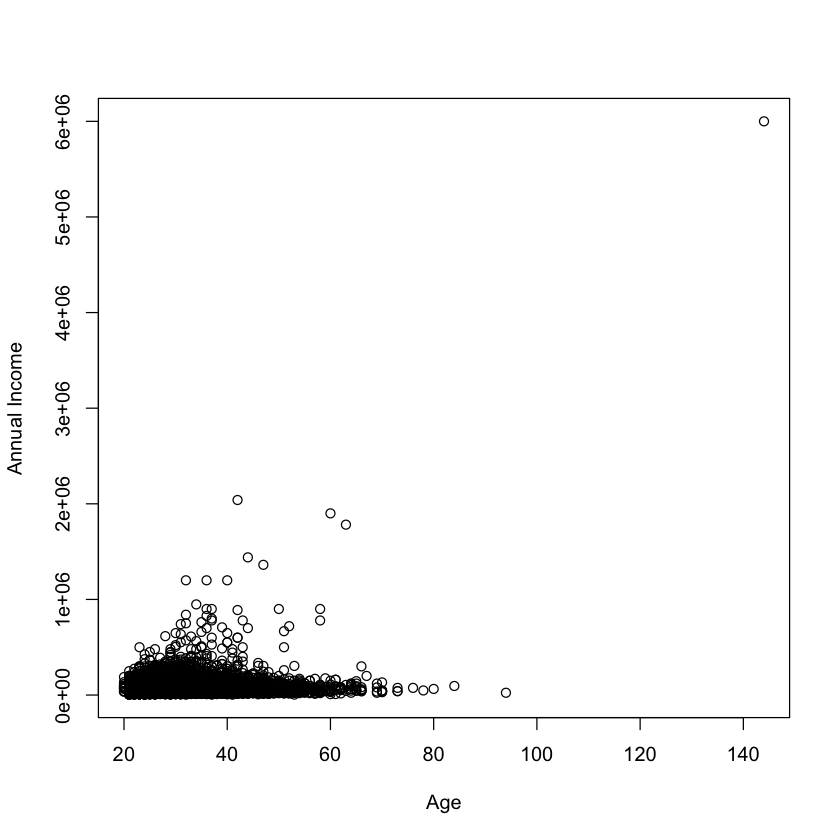

In [20]:
# Make bivariate scatterplot of age and annual income
plot(loan_data$age, loan_data$annual_inc, xlab = "Age", ylab = "Annual Income")

The bivariate plot still shows an outlier. In this case, the person with the huge annual wage of $6 million appeared to be 144 years old. It seems that the dataset is mistakenly inputed, so we will delete this observation from the data.